## Start2Impact - Progetto Machine Learning 2

di **Antonio Alberto Sabatini**

In [1]:
# Importiamo le librerie necessarie per esplorare, manipolare e visualizzare i dati
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carichiamo i dati in un dataframe pandas
data = pd.read_csv('data/housing.csv')

# Visualizziamone le dimensioni e la struttura
print(data.shape)
data.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Il dataset ha circa 20 mila righe e 9 features (oltre al target). Tutte queste sono numeriche tranne ocean_proximity, che è una variabile categorica ed andrà trasformata per essere utilizzata dai modelli

In [3]:
# Scopriamo se sono presenti NaN tra i dati
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Su 20 mila righe solo 207 contengono NaN (1%). Vista la proporzione bassa, potremmo semplicemente eliminare tali righe, ma preferisco attuare una soluzione meno drastica riempendo i valori mancanti con il la media della colonna. 

In [4]:
# Sostituzione NaN
data.fillna(data.mean(), inplace=True)

# Verifichiamo che il procedimento abbia funzionato
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Esploriamo i dati 

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Come possiamo notare nella tabella sopra, i valori non si trovano sullo stesso ordine di grandezza, e quindi in seguito andranno trasformati per permettere il funzionamento ottimale di alcuni modelli.

Possiamo inoltre vedere che il nostro target (median_house_value), ha valori compresi tra 500 mila e 15 mila e la mediana è di 180 mila.

## Visualizzazione dei dati

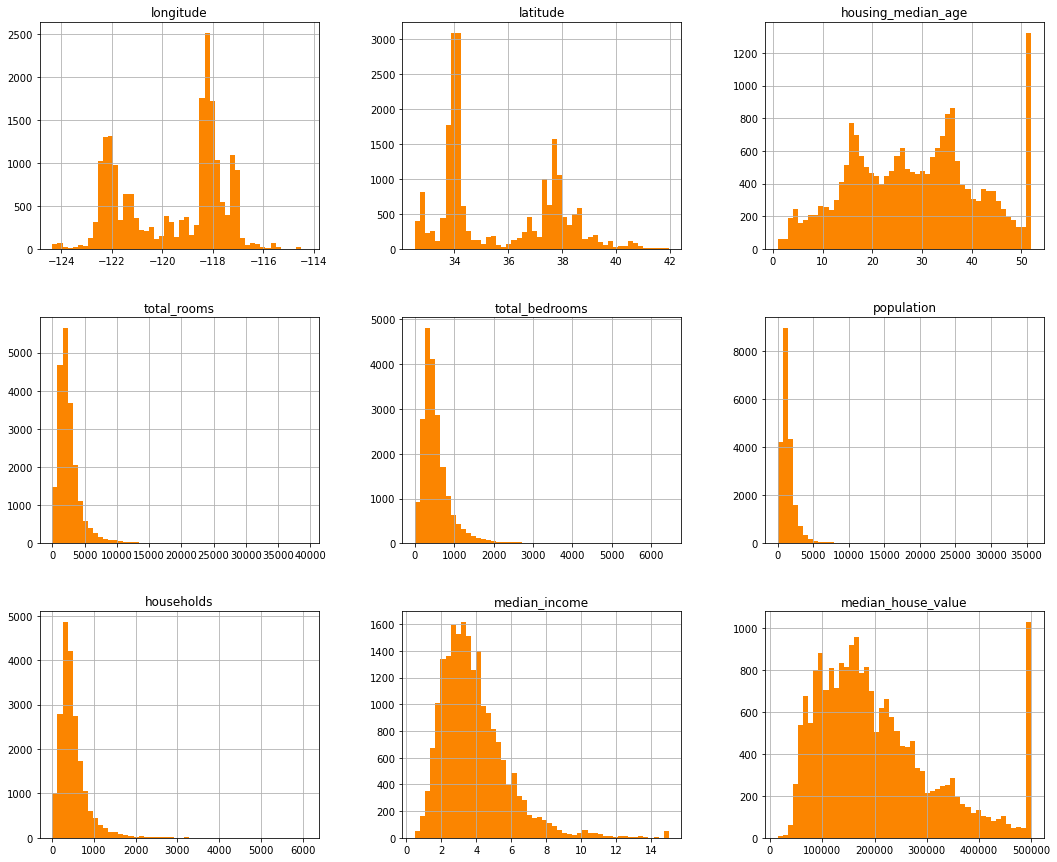

In [6]:
colors_palette = ['#161a1d', '#660708', '#fb8500', '#ffea00']

palette = sns.blend_palette(colors_palette, as_cmap=True)

# Controlliamo la distribuzione dei dati nelle colonne tramite gli istogramm
data.hist(bins=50, 
          figsize=(18 ,15), 
          color=colors_palette[2])

plt.show()

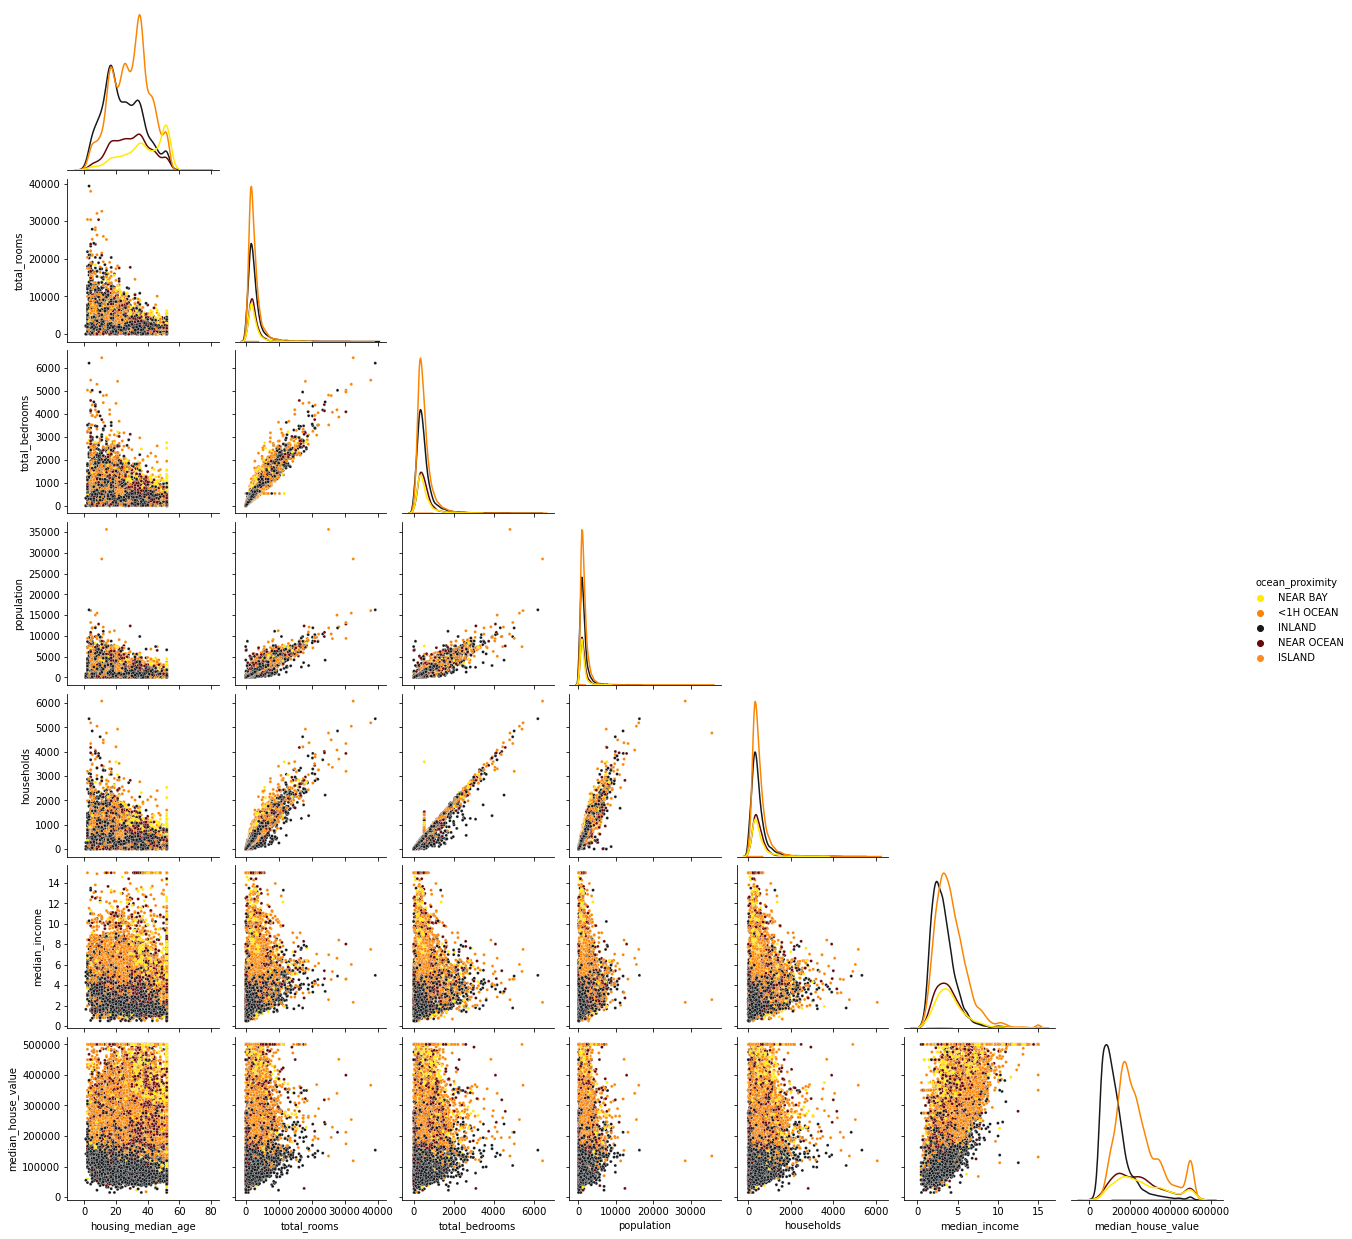

In [7]:
# Visualizziamo, tramite degli scatterplot, la distribuzione dei dati e se vi sono correlazioni evidenti
cols = list(data.columns[2:])

palette_colors = {
    'NEAR BAY': '#ffea00',
    '<1H OCEAN': '#fb8500',
    'INLAND': '#161a1d',
    'NEAR OCEAN': '#660708',
    'ISLAND': '#fb8b24',
}

sns.pairplot(data[cols], hue='ocean_proximity',
        corner=True, 
        diag_kws={'fill': False},
        plot_kws={'s': 9},
        palette=palette_colors
)

plt.show()

### Non vi è una netta correlazione tra le features e i target

Solo confrontando il target con median_income si può notare un collegamento tra valori numerici, correlazione facilmente intuibile. Netta è invece la distribuzione dei prezzi considerando la posizione rispetto al mare.

In generale, le zone vicino alle baie si posizionano nella zona alta dello scatterplot del prezzo, mentre le zone lontane dal mare (INLAND) si presentano sempre come quelle con il prezzo più basso. La zona centrale è occupata dalle case vicine all'oceano o a meno di un'ora da esso.

Infine, si può anche notare come la presenza di case nelle isole (ISLAND) sia particolarmente bassa. Visualizziamo la quantità esatta con value_counts()

In [8]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Abbiamo infatti solo 5 righe riguardanti case nelle Isole

Vista la particolare influenza della posizione sul prezzo delle abitazioni, possiamo visualizzare tramite uno scatterplot la disposizione dei dati su una mappa simulata della California, evidenziando popolazione e prezzo.  

<Figure size 720x720 with 0 Axes>

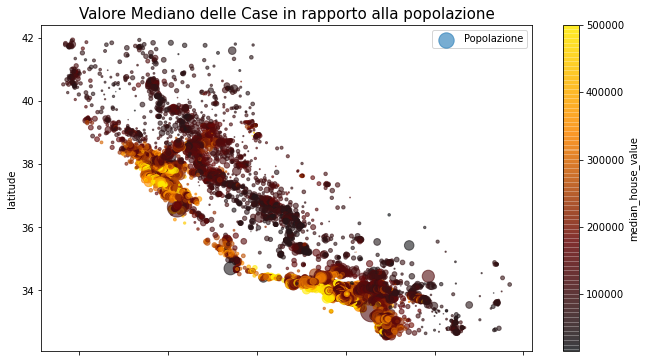

In [9]:
plt.figure(figsize=(10,10))

data.plot(kind='scatter', 
          x='longitude', 
          y='latitude', 
          s=data['population']/75, 
          c='median_house_value', 
          label='Popolazione',
          cmap=palette, 
          colorbar=True,
          alpha=0.6,
          figsize=(11,6),
)

plt.title('Valore Mediano delle Case in rapporto alla popolazione', size=15)
plt.legend()
plt.show()

Come si poteva facilmente immaginare, i prezzi maggiori si hanno in corrispondenza delle grandi zone metropolitane. In particolare **San Francisco**, **San Jose** e la **Silicon Valley** nelle zona costiera a nord, e **Los Angeles** e **San Diego** nella zona sud. Vi è anche una discreta concentrazione di popolazione e abitazioni in corrispondenza di **Sacramento**, ma con prezzi delle abitazioni più bassi.

Per scoprire l'esatto valore delle correlazioni tra le features e il target usiamo una correlation map

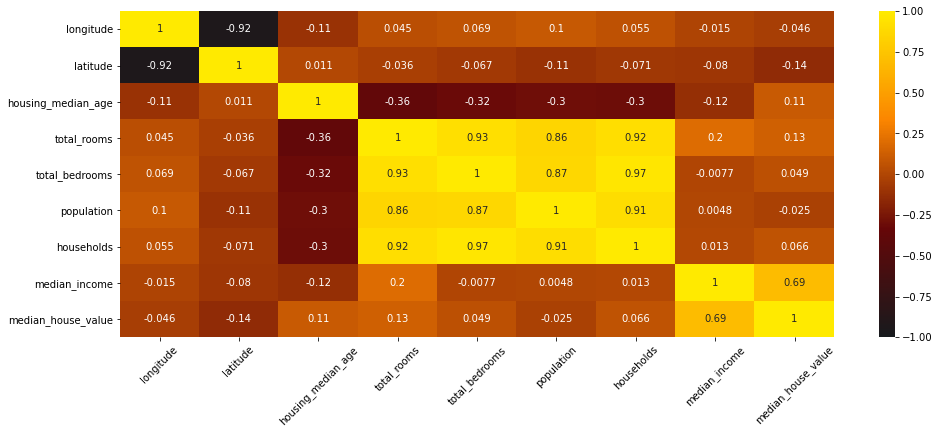

In [10]:
corr = data.corr()

plt.figure(figsize=(16, 6))

sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap=palette, annot=True)

plt.xticks(rotation=45)
plt.show()

Come era facile intuire osservando il *pairplot*, il valore mediano delle abitazioni è correlato in maniera forte solo con lo stipendio mediano. Esso sarà sicuramente la features più importante per i modelli, in quanto tutte le altre hanno valori di correlazione molto bassi  

### Prepariamo i dati ai modelli

Sistemiamo il dataframe trasformando la colonna ocean_proximity in variabili numeriche.

Poi creiamo le variabili X e y, dividiamole in training set e test set.

Infine in altre due variabili, trasformiamo i valori della X nello stesso ordine di grandezza, per permettere il giusto funzionamento di alcuni modelli

In [11]:
# Importo le librerie necessarie
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Tramite il metodo di Pandas get_dummies trasformiamo la colonna 'ocean_proximity' in più colonne che contengono il valore 1 o 0
# per ogni categoria
data = pd.get_dummies(data)

# Salviamo i valori in X e y
X = data.drop('median_house_value', axis=1).values
y = data.median_house_value.values

# Mischiamo i dati
X, y = shuffle(X, y, random_state=2)

# Dividiamo i dati in variabili dedicate al Training e al Test - Avendo 20 mila righe, scelgo di dedicare al test il 20% del totale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Visualizziamo la grandezza dei set di training e di allenamento
print("Train: ", X_train.shape)
print("Test : ", X_test.shape)

# Creiamo un dizionario dove salvare i risultati dei modelli per confrontarli alla fine
results = {}

Train:  (16512, 13)
Test :  (4128, 13)


In [12]:
# Creiamo le variabili con i dati scalati
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Costruiamo i modelli

I modelli che proverò a ottimizzare e confrontare tra loro sono:
- **KNNRegressor**
- **SVR** (Support Vector Regressor)
- **LinearModel** (trasformando le features in dati polinomiali)
- **RandomForestRegressor** 

Come metrica di valutazione utilizzerò l'r2_score e il MAE (mean absolute error).
Per capire se il modello sia abbastanza efficace, ricordiamo che i valori del target vanno da 15 mila a 500 mila.

Partiamo dal **K Nearest Neighbors Regressor**

In [13]:
import time # Importiamo il modulo di python 'time', per considerare l'efficenza di modelli

# Importiamo le funzioni per calcolare le metriche di valutazione
from sklearn.metrics import r2_score, mean_absolute_error

# Importiamo il modello
from sklearn.neighbors import KNeighborsRegressor

# Importiamo RandomizedSearchCv per individuare i parametri migliori effettuando ricerce random
from sklearn.model_selection import RandomizedSearchCV

In [14]:
params = {
    'n_neighbors': np.arange(1, 40, 3),
    'weights': ['uniform','distance']
}

knnReg = KNeighborsRegressor()

randomSearch = RandomizedSearchCV(estimator=knnReg, param_distributions=params, scoring='r2', cv=3, n_iter=15, n_jobs=-1)

# Ricerca dei parametri migliori e addestramento
start_time = time.time()
randomSearch.fit(X_train, y_train)
stop_time = time.time()

time_used = round(stop_time - start_time, 2)

print(f"Tempo impiegato per l'addestramento: {time_used} secondi")

Tempo impiegato per l'addestramento: 3.63 secondi


In [15]:
# Visualizziamo i risultati migliori
best_model = randomSearch.best_estimator_
best_train_score = randomSearch.best_score_

print(f"Miglior Modello ->  {best_model}")
print(f"Miglior Score ->    {best_train_score}")

# Vediamo i punteggi nel test
y_pred = randomSearch.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n\nTEST - Punteggi")
print(f"Mae -->      \t{mae_test}")
print(f"R2 Score --> \t{r2_test}")

Miglior Modello ->  KNeighborsRegressor(n_neighbors=22, weights='distance')
Miglior Score ->    0.31394637728472213


TEST - Punteggi
Mae -->      	72649.08885454433
R2 Score --> 	0.32141530960572384


I risultati ottenuti non sono ottimi, si tratta probabilmente di underfitting. L'errore è troppo alto rispetto al target, e infatti lo score è solo di 0.32

Proviamo a utilizzare lo stesso modello ma sfruttando i dati nello stesso ordine di grandezza

In [16]:
randomSearch = RandomizedSearchCV(estimator=knnReg, param_distributions=params, scoring='r2', cv=3, n_iter=15, n_jobs=-1)

# Ricerca dei parametri migliori e addestramento
start_time = time.time()
randomSearch.fit(X_train_scaled, y_train)
stop_time = time.time()

time_used = round(stop_time - start_time, 2)

print(f"Tempo impiegato per l'addestramento: {time_used} secondi")

Tempo impiegato per l'addestramento: 4.23 secondi


In [17]:
# Visualizziamo i risultati migliori
best_model = randomSearch.best_estimator_
best_train_score = randomSearch.best_score_

print(f"Miglior Modello ->  {best_model}")
print(f"Miglior Score ->    {best_train_score}")

# Vediamo i punteggi nel test
y_pred = randomSearch.predict(X_test_scaled)

mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n\nTEST - Punteggi")
print(f"Mae -->      \t{mae_test}")
print(f"R2 Score --> \t{r2_test}")

# Salviamo i risultati
results['Knn'] = [best_model, best_train_score, mae_test, r2_test, time_used]

Miglior Modello ->  KNeighborsRegressor(n_neighbors=13, weights='distance')
Miglior Score ->    0.7072180032448173


TEST - Punteggi
Mae -->      	40822.55651021323
R2 Score --> 	0.7176237966480732


I punteggi migliorano decisamente con i dati scalati. Inoltre l'r2 score è quasi uguale tra test e train, evidenziando la mancanza di overfitting o underfitting

Nonostante questo 40 mila è ancora un errore medio assoluto abbastanza alto. Proviamo ad ottenere risultati migliori con altri modelli

### Modello 2 - Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Addestramento
start_time = time.time()
model.fit(X_train, y_train)
stop_time = time.time()

time_used = round(stop_time - start_time, 2)

print(f"Tempo impiegato per l'addestramento: {time_used} secondi")

# Vediamo i punteggi sul Test
y_pred = model.predict(X_test)

# Metriche di valutazione
score = r2_score(y_test, y_pred)
meanAbsErr = mean_absolute_error(y_test, y_pred)

print(f"R2 score: \t{score}")
print(f"MAE:      \t{meanAbsErr}")

Tempo impiegato per l'addestramento: 0.01 secondi
R2 score: 	0.6529168892358583
MAE:      	48740.32088038834


In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_train_poly =  poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression(normalize=True)

# Addestramento
start_time = time.time()
model.fit(X_train_poly, y_train)
stop_time = time.time()

time_used = round(stop_time - start_time, 2)

print(f"Tempo impiegato per l'addestramento: {time_used} secondi")


# Vediamo i punteggi nel test
y_pred_train = model.predict(X_train_poly)
y_pred = model.predict(X_test_poly)

train_score = r2_score(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)


print("\n\nTEST - Punteggi")
print(f"Mae -->      \t{mae_test}")
print(f"R2 Score --> \t{r2_test}")

results['Linear Regression'] = [model, train_score, mae_test, r2_test, time_used]

Tempo impiegato per l'addestramento: 0.58 secondi


TEST - Punteggi
Mae -->      	38833.125377980316
R2 Score --> 	0.6993714118432639


Utilizzando PolynomialFeatures sui dati il modello migliora. Il MAE è infatti sceso di 10 mila.

## Modello 3 - SVR

In [20]:
from sklearn.svm import SVR
from sklearn.utils.fixes import loguniform

params = {
    'kernel': ['rbf', 'poly', 'linear'], # Il tipo di algoritmo alla base della svm
    'C': loguniform(1e0, 1e3),  # Parametro che gestisce la regolarizzazione
    'gamma': loguniform(1e-4, 1e0), # Coefficiente presente nell'algoritmo di alcuni kernel
    'epsilon':  np.power(2, np.linspace(-4, 1, 10).tolist()).tolist(), # Determina l'accuratezza della funzione
    'degree': [2, 3, 4], # Il grado della funzione nel caso in cui il kernel sia poly
}

model = SVR()

randomSearch = RandomizedSearchCV(model, params, n_iter=30, scoring='r2', cv=3, n_jobs=-1, random_state=2)

# Ricerca dei parametri migliori e addestramento
start_time = time.time()
randomSearch.fit(X_train_scaled, y_train)
stop_time = time.time()

time_used = round(stop_time - start_time, 2)

print(f"Tempo impiegato per l'addestramento: {time_used} secondi")

# Visualizziamo i risultati migliori
best_model = randomSearch.best_estimator_
best_train_score = randomSearch.best_score_

print(f"Miglior Modello ->  {best_model}")
print(f"Miglior Score ->    {best_train_score}")

# Vediamo i punteggi nel test
y_pred = randomSearch.predict(X_test_scaled)

mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n\nTEST - Punteggi")
print(f"Mae -->      \t{mae_test}")
print(f"R2 Score --> \t{r2_test}")

results['SVR'] = [best_model, best_train_score, mae_test, r2_test, time_used]

Tempo impiegato per l'addestramento: 334.31 secondi
Miglior Modello ->  SVR(C=698.6686649106753, degree=2, epsilon=1.3607900001743771,
    gamma=0.01149625751680968, kernel='linear')
Miglior Score ->    0.5032020734202697


TEST - Punteggi
Mae -->      	51681.42594608478
R2 Score --> 	0.5602860654861156


## Modello 4 - Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Numero di alberi nella foresta
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Numero massimo di livelli in un albero
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)


# Griglia dei parametri
params = {'n_estimators': n_estimators,
               'max_features': ['auto', 'sqrt'], # Numero di features da considerare ad ogni nodo
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10], # Numero minimo di esempi per divedere un nodo
               'min_samples_leaf': [1, 2, 4], # Numero minimo di esempi per ogni foglia
               'bootstrap': [True, False] # Metodo di selezione degli esempi
}

model = RandomForestRegressor(random_state=2)

In [22]:
randomSearch = RandomizedSearchCV(estimator=model, 
                                  param_distributions=params, 
                                  n_iter=20, # Riduco il numero di iterazioni in quanto questo modello richede più tempo e risorse
                                  cv=3, 
                                  n_jobs=-1,
                                  random_state=2)

# Ricerca dei parametri migliori e addestramento
start_time = time.time()
randomSearch.fit(X_train, y_train)
stop_time = time.time()

time_used = round(stop_time - start_time, 2)

print(f"Tempo impiegato per l'addestramento: {time_used} secondi")

Tempo impiegato per l'addestramento: 1068.42 secondi


In [23]:
# Visualizziamo i risultati migliori
print(f"Miglior Score ->    {randomSearch.best_score_}")
print(f"Miglior Modello ->  {randomSearch.best_estimator_}")

print("\nTest")

# Visualizziamo i risultati migliori
best_model = randomSearch.best_estimator_
best_train_score = randomSearch.best_score_

print(f"Miglior Modello ->  {best_model}")
print(f"Miglior Score ->    {best_train_score}")

# Vediamo i punteggi nel test
y_pred = randomSearch.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n\nTEST - Punteggi")
print(f"Mae -->      \t{mae_test}")
print(f"R2 Score --> \t{r2_test}")

results['Random Forest'] = [best_model, best_train_score, mae_test, r2_test, time_used]

Miglior Score ->    0.8182109754040514
Miglior Modello ->  RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      n_estimators=1200, random_state=2)

Test
Miglior Modello ->  RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      n_estimators=1200, random_state=2)
Miglior Score ->    0.8182109754040514


TEST - Punteggi
Mae -->      	31545.676709934858
R2 Score --> 	0.8157682147409494


# Confrontiamo i risultati ottenuti

In [24]:
# Visualizzazione dei punteggi 
for key in results:
    print(f"\n\nTipologia Modello: {key}")
    print("----------------------------")
    
    print("Miglior modello trovato: ", results[key][0])
    print(f"R2 Score nel Training:   {results[key][1]}")
    print(f"R2 Score nel Test:       {results[key][3]}")
    print(f"M.A.E. nel   Test:       {results[key][2]}")
    print(f"Tempo Addestramento (s): {results[key][4]}")



Tipologia Modello: Knn
----------------------------
Miglior modello trovato:  KNeighborsRegressor(n_neighbors=13, weights='distance')
R2 Score nel Training:   0.7072180032448173
R2 Score nel Test:       0.7176237966480732
M.A.E. nel   Test:       40822.55651021323
Tempo Addestramento (s): 4.23


Tipologia Modello: Linear Regression
----------------------------
Miglior modello trovato:  LinearRegression(normalize=True)
R2 Score nel Training:   0.77896419347118
R2 Score nel Test:       0.6993714118432639
M.A.E. nel   Test:       38833.125377980316
Tempo Addestramento (s): 0.58


Tipologia Modello: SVR
----------------------------
Miglior modello trovato:  SVR(C=698.6686649106753, degree=2, epsilon=1.3607900001743771,
    gamma=0.01149625751680968, kernel='linear')
R2 Score nel Training:   0.5032020734202697
R2 Score nel Test:       0.5602860654861156
M.A.E. nel   Test:       51681.42594608478
Tempo Addestramento (s): 334.31


Tipologia Modello: Random Forest
---------------------------

### Il modello migliore è il Random Forest

Esso, nonostante sia il peggiore in termine di efficienza, ha i migliori punteggi. Con un Mean Absolute Error di 31mila è il migliore tra i modelli usati. Inoltre confrontando l'R2 Score del Training e del Test possiamo vedere che sono molto vicini, dimostrando come il modello sia solido e con bassa varianza. 